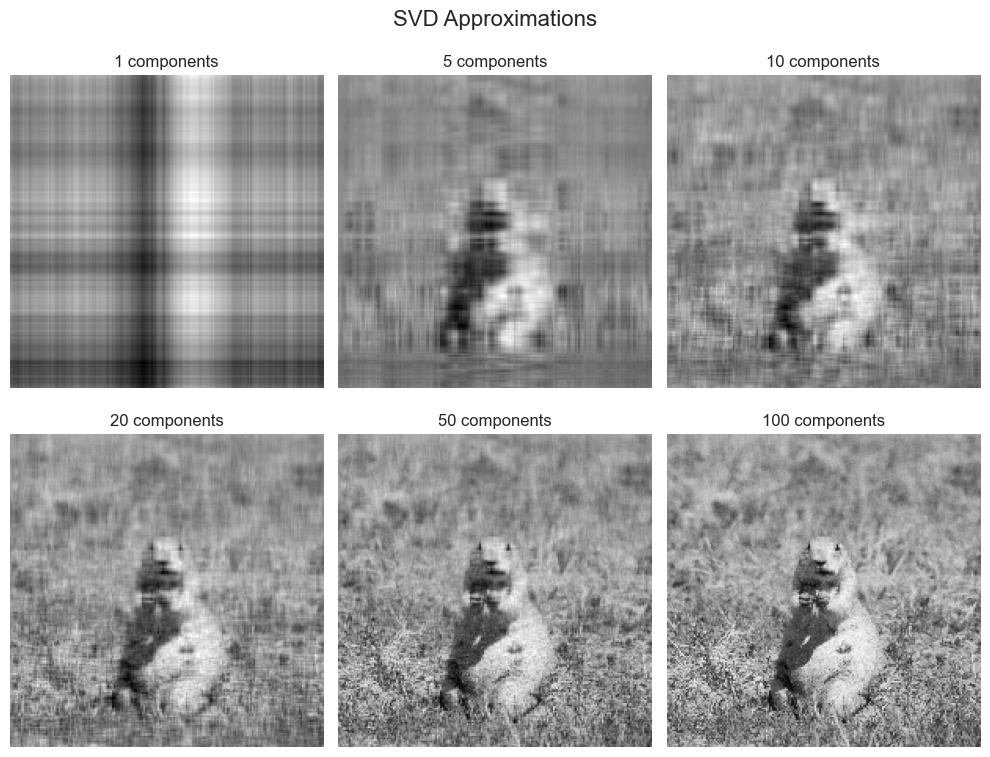

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd
import cv2

# Function to perform SVD and reconstruct the image
def svd_reconstruct_image(image, components):
    # Perform SVD on the grayscale image
    U, S, Vt = svd(image, full_matrices=False)
    
    # Reconstruct the image using a given number of components
    def reconstruct(U, S, Vt, num_components):
        return np.dot(U[:, :num_components], np.dot(np.diag(S[:num_components]), Vt[:num_components, :]))
    
    reconstructed_image = reconstruct(U, S, Vt, components)
    return np.clip(reconstructed_image, 0, 255).astype(np.uint8)  # Ensure values are between 0 and 255

# Load and resize an example grayscale image using OpenCV
image = cv2.imread("../data/svd/prairie_dog.jpg", cv2.IMREAD_GRAYSCALE)  # Load as grayscale
image = cv2.resize(image, (200, 200))  # Resize the image to a smaller size for easier computation

# Plot the original image
plt.style.use("seaborn-v0_8-whitegrid")
plt.figure(figsize=(10, 8))
# plt.subplot(2, 3, 1)

# plt.imshow(image, cmap='gray')
# plt.title("Original")
# plt.axis('off')

# Plot several approximations with increasing number of components
components_list = [1, 5, 10, 20, 50, 100]
for i, components in enumerate(components_list, 1):
    reconstructed_image = svd_reconstruct_image(image, components)
    plt.subplot(2, 3, i)
    plt.imshow(reconstructed_image, cmap="gray")
    plt.title(f"{components} components")
    plt.axis("off")

plt.suptitle("SVD Approximations", fontsize=16)
plt.tight_layout()
plt.show()
